### Jasmine Dumas (1523905)
### CSC 478: Programming Machine Learning Applications - Autumn 2016
### [Assignment #3](http://facweb.cs.depaul.edu/mobasher/classes/csc478/Assignments/assign3.html)
### Due: Thursday, November 3, 2016

For this assignment you will experiment with various regression approaches and you'll get your feet wet with some clustering. We will rely on subsets of some real-world data sets and on tools from the Scikit-learn machine learning package for Python as well as modules from the textbook code (Machine Learning in Action, Chapters 8 and 10).

In [1]:
## load libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import pylab as pl
%matplotlib inline

1. **Linear Regression [Dataset: communities.zip]**

  * For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

  * Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .**

a. **Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn.** 
  * The provided data is already normalized (see description), so there is no need for additional normalization. 
  * Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [67]:
comms = pd.read_csv("communities/communities.csv")
comms.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [68]:
# how many columns and rows?
comms.shape

(1994, 100)

In [69]:
# what are the basic statistics for each of the variable?
comms.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [70]:
# handle missing data
np.sum(np.array(pd.isnull(comms)),0)  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
comms["OtherPerCap"].unique() # there is that ? used for a missing value

array(['0.36', '0.22', '0.28', '0.51', '0.48', '0.24', '0.18', '0.29',
       '0.17', '0.34', '0.35', '0.13', '0.33', '0.2', '1', '0.72', '0',
       '0.19', '0.3', '0.38', '0.14', '0.26', '0.64', '0.25', '0.37',
       '0.16', '0.15', '0.76', '0.4', '0.42', '0.23', '0.31', '0.32',
       '0.5', '0.66', '0.21', '0.7', '0.27', '0.11', '0.55', '0.95',
       '0.03', '0.45', '0.08', '0.43', '0.62', '0.02', '0.41', '?', '0.39',
       '0.88', '0.71', '0.44', '0.47', '0.09', '0.53', '0.1', '0.46',
       '0.05', '0.52', '0.75', '0.06', '0.93', '0.12', '0.77', '0.69',
       '0.86', '0.73', '0.67', '0.84', '0.81', '0.54', '0.59', '0.01',
       '0.68', '0.98', '0.04', '0.61', '0.9', '0.57', '0.49', '0.56',
       '0.07', '0.92', '0.6', '0.94', '0.63', '0.87', '0.79', '0.99',
       '0.58', '0.83', '0.85', '0.8', '0.82', '0.74', '0.65', '0.89'], dtype=object)

In [72]:
comms.dtypes

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap               object
HispPerCap               float64
NumUnderPov              float64
          

In [73]:
comms.OtherPerCap = pd.to_numeric(comms.OtherPerCap, errors='coerce') # coerce arg turns failures into NaN
comms.dtypes

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap              float64
HispPerCap               float64
NumUnderPov              float64
          

In [82]:
comms = comms.dropna(axis=0)

In [83]:
# seperate the target attribute
y = np.array(comms.ViolentCrimesPerPop)
X = np.array(comms.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1))

In [84]:
# check that was successful
X.shape

(1993, 97)

In [85]:
y

array([ 0.2 ,  0.67,  0.43, ...,  0.23,  0.19,  0.48])

In [86]:
y.shape

(1993,)

b. **Perform standard linear regression on data using the implementation for Ch. 8 of MLA.** 
  * Compute the RMSE value on the full training data. 
  * Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). 
  * Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).


In [87]:
# Machine Learning in Action - Ch. 8, page 157

#we need to add a row of 1's to the X matrix since we want a constant in the model
x_var = np.array(X)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])

def standRegres(xArr, yArr):
    xMat = np.matrix(xArr) ; yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws



In [89]:
std_linear = standRegres(x_var, y)

In [90]:
std_linear

matrix([[  1.58394687e-01],
        [ -3.02481869e-02],
        [  2.12229063e-01],
        [ -3.97237986e-02],
        [ -1.27930326e-02],
        [  6.36900639e-02],
        [  1.22194419e-01],
        [ -2.23124229e-01],
        [ -1.42627637e-01],
        [  5.64658800e-02],
        [ -2.60230134e-01],
        [  4.65037847e-02],
        [ -2.00798143e-01],
        [ -2.08126761e-01],
        [  4.70792802e-02],
        [ -1.73534979e-01],
        [  5.82291674e-02],
        [  1.05064444e-02],
        [ -9.22106451e-02],
        [  2.72565616e-01],
        [  9.72713359e-02],
        [ -3.26302914e-01],
        [ -2.89431388e-02],
        [ -3.59461641e-02],
        [  2.28885702e-02],
        [  4.31169895e-02],
        [  3.76737976e-02],
        [  1.19950473e-01],
        [ -1.83693623e-01],
        [ -9.47657739e-02],
        [  5.55240764e-02],
        [  1.07281673e-01],
        [  3.24692051e-03],
        [  2.34646790e-01],
        [ -3.87649999e-02],
        [ -1.0317924

In [99]:
# RMSE
yHat = x_var*std_linear
yHatT = yHat.T
err = abs(yHatT - y)
total_error = np.dot(err,err.T)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print(rmse_train) 

[[ 0.12869119]]


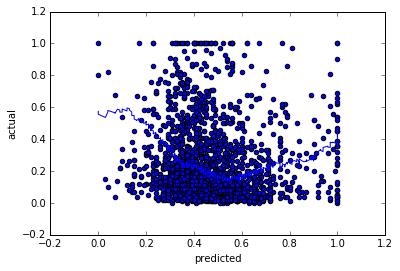

In [98]:
# Plot correlation between the predicted and actual values of the target attribute

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])

xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*std_linear

ax.plot(xCopy[:,1], yHat)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show() 

In [106]:
# 10-fold cross-validation
X_array = np.array(x_var)
y_array = np.array(y)

In [112]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
from sklearn.metrics import zero_one_loss

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x_var,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(x_var), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x_var[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(x_var[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x_var))

In [115]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1287
RMSE on 10-fold CV: 0.1363


The 10-fold cross validation RMSE was higher than the original, leading to a more precise model to try an overcome the differences in variance.

c. **Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. **
  * For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). 
  * Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]